In [65]:
import pandas as pd
import numpy as np
from datetime import (
    datetime,
    timedelta
    )
from dateutil.parser import parse
import matplotlib.pyplot as plt

# Capítulo 11 - Séries temporais

## 11.1 - Tipos de dados e ferramentas para datae hora

In [3]:
now = datetime.now()
now

datetime.datetime(2022, 11, 4, 17, 43, 42, 16315)

In [4]:
now.year, now.month, now.day

(2022, 11, 4)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
start = datetime(2011, 1, 7)

In [7]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

🗒️ Tipos no módulo datetime - pág 562

### Conversão entre string e datetime

In [9]:
stamp = datetime(2011, 1, 3)

In [10]:
str(stamp)

'2011-01-03 00:00:00'

In [11]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

🗒️ Especificação de formatos de datetime (compatível com ISO C89) - pág 563

In [12]:
value = '2011-01-03'

In [13]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
datestrs = ['7/6/2011', '8/6/2011']

In [15]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [16]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [18]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [19]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [20]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

🗒️ Formatação de data específica de localidades - pág 567

## 11.2 - Básico sobre séries temporais

In [21]:
dates = [datetime(2011, 1, 2), datetime(2011,1,5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.557056
2011-01-05   -1.206434
2011-01-07   -0.879388
2011-01-08    0.504179
2011-01-10    1.559891
2011-01-12    1.363262
dtype: float64

In [22]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [23]:
ts + ts[::2]

2011-01-02    3.114111
2011-01-05         NaN
2011-01-07   -1.758776
2011-01-08         NaN
2011-01-10    3.119782
2011-01-12         NaN
dtype: float64

In [24]:
ts.index.dtype

dtype('<M8[ns]')

In [25]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexação, seleção e geração de subconjuntos

In [26]:
stamps = ts.index[2]

In [27]:
ts[stamps]

-0.8793878422603918

In [28]:
ts['1/10/2011']

1.5598907615566926

In [29]:
ts['20110110']

1.5598907615566926

In [30]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [31]:
longer_ts

2000-01-01   -1.205650
2000-01-02    0.614247
2000-01-03   -0.043604
2000-01-04   -0.984578
2000-01-05   -0.035220
                ...   
2002-09-22   -1.181711
2002-09-23    0.177743
2002-09-24   -1.069863
2002-09-25   -1.242194
2002-09-26    0.596598
Freq: D, Length: 1000, dtype: float64

In [32]:
longer_ts['2001']

2001-01-01    0.585183
2001-01-02    1.512309
2001-01-03    2.140275
2001-01-04   -1.271187
2001-01-05   -1.404427
                ...   
2001-12-27    0.516797
2001-12-28   -0.501095
2001-12-29    0.702927
2001-12-30    1.273472
2001-12-31    1.465614
Freq: D, Length: 365, dtype: float64

In [33]:
longer_ts['2001-05']

2001-05-01    1.244124
2001-05-02   -0.836894
2001-05-03    2.943527
2001-05-04   -0.321907
2001-05-05    0.054825
2001-05-06    0.038516
2001-05-07   -1.456889
2001-05-08    0.336242
2001-05-09    0.946729
2001-05-10   -1.579979
2001-05-11   -0.769801
2001-05-12   -1.530321
2001-05-13   -1.510906
2001-05-14    2.075145
2001-05-15    0.593791
2001-05-16   -0.734502
2001-05-17    0.219135
2001-05-18    1.149056
2001-05-19    2.568231
2001-05-20    1.019984
2001-05-21    1.929306
2001-05-22    0.341737
2001-05-23    0.395815
2001-05-24   -0.258801
2001-05-25    1.793583
2001-05-26   -1.267241
2001-05-27   -1.087677
2001-05-28   -0.070424
2001-05-29    0.645486
2001-05-30   -0.349549
2001-05-31    0.148245
Freq: D, dtype: float64

In [34]:
ts[datetime(2011, 1, 7)]

-0.8793878422603918

In [35]:
ts

2011-01-02    1.557056
2011-01-05   -1.206434
2011-01-07   -0.879388
2011-01-08    0.504179
2011-01-10    1.559891
2011-01-12    1.363262
dtype: float64

In [36]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.879388
2011-01-08    0.504179
2011-01-10    1.559891
dtype: float64

In [37]:
ts.truncate(after='1/9/2011')

2011-01-02    1.557056
2011-01-05   -1.206434
2011-01-07   -0.879388
2011-01-08    0.504179
dtype: float64

In [38]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [39]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates, 
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [40]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.871793,0.043606,-1.146488,0.385175
2001-05-09,-0.042211,0.125485,-1.421317,-0.528836
2001-05-16,2.368823,0.265555,-0.730393,-0.250067
2001-05-23,-1.160177,-0.162806,-0.082456,-2.003617
2001-05-30,-2.250596,0.945708,-0.544161,-0.599443


### Séries temporais com índices duplicativos

In [41]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000','1/2/2000', '1/2/2000', '1/3/2000'])

In [42]:
dups_ts = pd.Series(np.arange(5), index=dates)

In [43]:
dups_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [44]:
dups_ts.index.is_unique

False

In [45]:
dups_ts['1/3/2000'] # não duplicado

4

In [46]:
dups_ts['1/2/2000'] # duplicado

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [47]:
grouped = dups_ts.groupby(level=0)

In [48]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [49]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Intervalos de datas, frequências e deslocamentos

In [50]:
ts

2011-01-02    1.557056
2011-01-05   -1.206434
2011-01-07   -0.879388
2011-01-08    0.504179
2011-01-10    1.559891
2011-01-12    1.363262
dtype: float64

In [51]:
resampler = ts.resample('D')

### Gerando intervalos de datas

In [52]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [53]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [55]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

🗒️ Frequências básicas de séries temporais (não está completa) - pág 580

In [56]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequências e offset de datas

In [58]:
from pandas.tseries.offsets import Hour, Minute

In [59]:
hour = Hour()
hour

<Hour>

In [60]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [61]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [62]:
Hour(2) + Minute(30)

<150 * Minutes>

In [63]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Datas com a semana do mês

In [64]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [65]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Deslocamento de datas (adiantando e atrasando)

In [66]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.466682
2000-02-29   -1.351585
2000-03-31   -0.054691
2000-04-30    0.853933
Freq: M, dtype: float64

In [67]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.466682
2000-04-30   -1.351585
Freq: M, dtype: float64

In [68]:
ts.shift(-2)

2000-01-31   -0.054691
2000-02-29    0.853933
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [69]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29    -3.896157
2000-03-31    -0.959536
2000-04-30   -16.613852
Freq: M, dtype: float64

In [70]:
ts.shift(2, freq='M')

2000-03-31    0.466682
2000-04-30   -1.351585
2000-05-31   -0.054691
2000-06-30    0.853933
Freq: M, dtype: float64

In [71]:
ts.shift(3, freq='D')

2000-02-03    0.466682
2000-03-03   -1.351585
2000-04-03   -0.054691
2000-05-03    0.853933
dtype: float64

In [72]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.466682
2000-02-29 01:30:00   -1.351585
2000-03-31 01:30:00   -0.054691
2000-04-30 01:30:00    0.853933
dtype: float64

### Deslocando datas com offsets

In [73]:
from pandas.tseries.offsets import Day, MonthEnd

In [74]:
now = datetime(2011, 11, 17)

In [75]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [76]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [77]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [78]:
offset = MonthEnd()

In [79]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [80]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [81]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.138492
2000-01-19   -0.120710
2000-01-23    1.247824
2000-01-27    0.022660
2000-01-31   -0.382790
2000-02-04   -0.033439
2000-02-08   -1.331517
2000-02-12   -0.816184
2000-02-16   -1.926289
2000-02-20   -0.381083
2000-02-24    0.798352
2000-02-28   -1.448493
2000-03-03    0.883100
2000-03-07   -0.177686
2000-03-11    1.253383
2000-03-15   -1.888555
2000-03-19   -0.385136
2000-03-23   -0.075225
2000-03-27   -1.691618
2000-03-31    3.003952
Freq: 4D, dtype: float64

In [82]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.125699
2000-02-29   -0.734093
2000-03-31    0.115277
dtype: float64

In [83]:
ts.resample('M').mean()

2000-01-31    0.125699
2000-02-29   -0.734093
2000-03-31    0.115277
Freq: M, dtype: float64

## 11.4 - Tratamento de fusos horários

In [84]:
import pytz

In [85]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [86]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Localização e conversão dos fusos horários

In [87]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [88]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.743017
2012-03-10 09:30:00   -0.175488
2012-03-11 09:30:00    1.901454
2012-03-12 09:30:00    0.894840
2012-03-13 09:30:00   -0.026734
2012-03-14 09:30:00    0.779792
Freq: D, dtype: float64

In [89]:
print(ts.index.tz)

None


In [90]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [91]:
ts

2012-03-09 09:30:00   -1.743017
2012-03-10 09:30:00   -0.175488
2012-03-11 09:30:00    1.901454
2012-03-12 09:30:00    0.894840
2012-03-13 09:30:00   -0.026734
2012-03-14 09:30:00    0.779792
Freq: D, dtype: float64

In [92]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.743017
2012-03-10 09:30:00+00:00   -0.175488
2012-03-11 09:30:00+00:00    1.901454
2012-03-12 09:30:00+00:00    0.894840
2012-03-13 09:30:00+00:00   -0.026734
2012-03-14 09:30:00+00:00    0.779792
Freq: D, dtype: float64

In [93]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [94]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -1.743017
2012-03-10 04:30:00-05:00   -0.175488
2012-03-11 05:30:00-04:00    1.901454
2012-03-12 05:30:00-04:00    0.894840
2012-03-13 05:30:00-04:00   -0.026734
2012-03-14 05:30:00-04:00    0.779792
Freq: D, dtype: float64

In [95]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.743017
2012-03-10 14:30:00+00:00   -0.175488
2012-03-11 13:30:00+00:00    1.901454
2012-03-12 13:30:00+00:00    0.894840
2012-03-13 13:30:00+00:00   -0.026734
2012-03-14 13:30:00+00:00    0.779792
dtype: float64

In [96]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operações com objetos Timestamp que consideram fusos horários

In [97]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [98]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [99]:
stamp_utc.value

1299902400000000000

In [100]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [101]:
from pandas.tseries.offsets import Hour

In [102]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [103]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [104]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [105]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operações entre fusos horários diferentes

In [106]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.103365
2012-03-08 09:30:00    1.060353
2012-03-09 09:30:00   -1.226541
2012-03-12 09:30:00    0.994193
2012-03-13 09:30:00    1.020033
2012-03-14 09:30:00   -0.627870
2012-03-15 09:30:00    1.524186
2012-03-16 09:30:00    0.475607
2012-03-19 09:30:00   -0.792655
2012-03-20 09:30:00    0.593607
Freq: B, dtype: float64

In [107]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 - Períodos e aritmética com períodos

In [108]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [109]:
p + 5

Period('2012', 'A-DEC')

In [110]:
p - 2

Period('2005', 'A-DEC')

In [113]:
pd.Period(2014, freq='A-DEC') - p

<7 * YearEnds: month=12>

In [114]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [115]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.601378
2000-02    0.815759
2000-03   -1.612749
2000-04   -1.415182
2000-05    0.690208
2000-06    1.051547
Freq: M, dtype: float64

In [116]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Conversão de frequência de períodos

In [117]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [118]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [119]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [120]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [121]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [122]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [123]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [124]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.770550
2007   -0.133935
2008    0.443013
2009   -0.460053
Freq: A-DEC, dtype: float64

In [125]:
ts.asfreq('M', how='start')

2006-01    1.770550
2007-01   -0.133935
2008-01    0.443013
2009-01   -0.460053
Freq: M, dtype: float64

In [126]:
ts.asfreq('B', how='end')

2006-12-29    1.770550
2007-12-31   -0.133935
2008-12-31    0.443013
2009-12-31   -0.460053
Freq: B, dtype: float64

### Frequências de período trimestrais

In [127]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [128]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [129]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [130]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16
p4pm

Period('2012-01-30 00:16', 'T')

In [131]:
p4pm.to_timestamp()

Timestamp('2012-01-30 00:16:00')

In [132]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [133]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Convertendo timestamps para períodos (e vice-versa)

In [134]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.375422
2000-02-29   -0.545585
2000-03-31   -1.235260
Freq: M, dtype: float64

In [135]:
pts = ts.to_period()
pts

2000-01   -0.375422
2000-02   -0.545585
2000-03   -1.235260
Freq: M, dtype: float64

In [136]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.274351
2000-01-30    0.276259
2000-01-31   -0.101216
2000-02-01    0.474215
2000-02-02    0.537578
2000-02-03   -1.776220
Freq: D, dtype: float64

In [137]:
ts2.to_period('M')

2000-01    1.274351
2000-01    0.276259
2000-01   -0.101216
2000-02    0.474215
2000-02    0.537578
2000-02   -1.776220
Freq: M, dtype: float64

In [138]:
pts = ts2.to_period()
pts

2000-01-29    1.274351
2000-01-30    0.276259
2000-01-31   -0.101216
2000-02-01    0.474215
2000-02-02    0.537578
2000-02-03   -1.776220
Freq: D, dtype: float64

In [140]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    1.274351
2000-01-30 23:59:59.999999999    0.276259
2000-01-31 23:59:59.999999999   -0.101216
2000-02-01 23:59:59.999999999    0.474215
2000-02-02 23:59:59.999999999    0.537578
2000-02-03 23:59:59.999999999   -1.776220
Freq: D, dtype: float64

### Criando um PeriodIndex a partir de arrays

In [3]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [5]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [6]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [7]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 - Reamostragem e conversão de frequências

In [8]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -1.569515
2000-01-02   -1.059814
2000-01-03   -0.517095
2000-01-04    1.038356
2000-01-05   -0.327388
                ...   
2000-04-05   -0.489857
2000-04-06   -0.987057
2000-04-07    0.478377
2000-04-08   -0.551343
2000-04-09    0.300762
Freq: D, Length: 100, dtype: float64

In [11]:
ts.resample('M').mean()

2000-01-31    0.001960
2000-02-29    0.350729
2000-03-31   -0.268556
2000-04-30    0.092113
Freq: M, dtype: float64

In [12]:
ts.resample('M', kind='period').mean()

2000-01    0.001960
2000-02    0.350729
2000-03   -0.268556
2000-04    0.092113
Freq: M, dtype: float64

🗒️ Argumentos do método resample - pág 615

### Downsampling

In [13]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [14]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [15]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [35]:
# sá erro
#ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

C:\Users\saulo\AppData\Local\Temp\ipykernel_70092\353562705.py:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right', label='right', loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [37]:
ts.resample('5min', closed='right', label='right').sum().shift(freq='-1s')

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### Reamostragem OHLC (Open-High-Low_Close)

In [38]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling e interpolação

In [40]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['colorado', 'texas', 'new york', 'ohio'])
frame

,colorado,texas,new york,ohio
2000-01-05,0.418916,-1.107945,0.822132,1.811978
2000-01-12,-0.187046,-0.480935,1.442359,0.235376


In [41]:
df_daily = frame.resample('D').asfreq()
df_daily

,colorado,texas,new york,ohio
2000-01-05,0.418916,-1.107945,0.822132,1.811978
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.187046,-0.480935,1.442359,0.235376


In [42]:
frame.resample('D').ffill()

,colorado,texas,new york,ohio
2000-01-05,0.418916,-1.107945,0.822132,1.811978
2000-01-06,0.418916,-1.107945,0.822132,1.811978
2000-01-07,0.418916,-1.107945,0.822132,1.811978
2000-01-08,0.418916,-1.107945,0.822132,1.811978
2000-01-09,0.418916,-1.107945,0.822132,1.811978
2000-01-10,0.418916,-1.107945,0.822132,1.811978
2000-01-11,0.418916,-1.107945,0.822132,1.811978
2000-01-12,-0.187046,-0.480935,1.442359,0.235376


In [43]:
frame.resample('D').ffill(limit=2)

,colorado,texas,new york,ohio
2000-01-05,0.418916,-1.107945,0.822132,1.811978
2000-01-06,0.418916,-1.107945,0.822132,1.811978
2000-01-07,0.418916,-1.107945,0.822132,1.811978
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.187046,-0.480935,1.442359,0.235376


In [44]:
frame.resample('W-THU').ffill()

,colorado,texas,new york,ohio
2000-01-06,0.418916,-1.107945,0.822132,1.811978
2000-01-13,-0.187046,-0.480935,1.442359,0.235376


### Reamostragem com períodos

In [45]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['colorado', 'texas', 'new yotk', 'ohio'])
frame.head()

,colorado,texas,new yotk,ohio
2000-01,-1.313032,-1.411300,1.314384,-0.170932
2000-02,-0.872653,-0.018082,0.429633,1.179506
2000-03,-1.149279,0.953554,-0.079696,-0.489282
2000-04,0.729015,0.417589,-1.000153,1.110522
2000-05,0.812699,0.803486,-0.063878,-0.489690


In [46]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,colorado,texas,new yotk,ohio
2000,-0.336012,0.107409,0.113333,-0.220466
2001,-0.637961,-0.427556,0.440163,-0.326891


In [47]:
annual_frame.resample('Q-DEC').ffill()

,colorado,texas,new yotk,ohio
2000Q1,-0.336012,0.107409,0.113333,-0.220466
2000Q2,-0.336012,0.107409,0.113333,-0.220466
2000Q3,-0.336012,0.107409,0.113333,-0.220466
2000Q4,-0.336012,0.107409,0.113333,-0.220466
2001Q1,-0.637961,-0.427556,0.440163,-0.326891
2001Q2,-0.637961,-0.427556,0.440163,-0.326891
2001Q3,-0.637961,-0.427556,0.440163,-0.326891
2001Q4,-0.637961,-0.427556,0.440163,-0.326891


In [48]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,colorado,texas,new yotk,ohio
2000Q4,-0.336012,0.107409,0.113333,-0.220466
2001Q1,-0.336012,0.107409,0.113333,-0.220466
2001Q2,-0.336012,0.107409,0.113333,-0.220466
2001Q3,-0.336012,0.107409,0.113333,-0.220466
2001Q4,-0.637961,-0.427556,0.440163,-0.326891


In [49]:
annual_frame.resample('Q-MAR').ffill()

,colorado,texas,new yotk,ohio
2000Q4,-0.336012,0.107409,0.113333,-0.220466
2001Q1,-0.336012,0.107409,0.113333,-0.220466
2001Q2,-0.336012,0.107409,0.113333,-0.220466
2001Q3,-0.336012,0.107409,0.113333,-0.220466
2001Q4,-0.637961,-0.427556,0.440163,-0.326891
2002Q1,-0.637961,-0.427556,0.440163,-0.326891
2002Q2,-0.637961,-0.427556,0.440163,-0.326891
2002Q3,-0.637961,-0.427556,0.440163,-0.326891


## 11.7 - Funções de janela móvel

In [50]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)

In [51]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [52]:
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

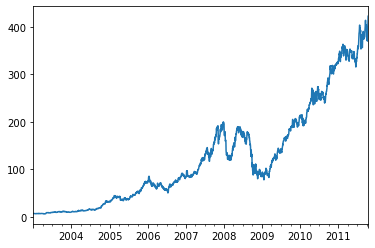

In [53]:
close_px.AAPL.plot()

<AxesSubplot:>

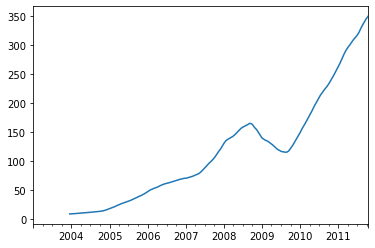

In [54]:
close_px.AAPL.rolling(250).mean().plot()

In [55]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

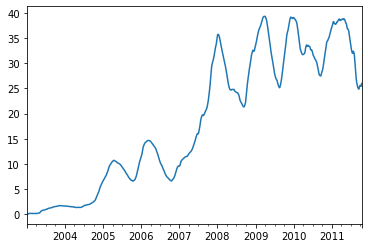

In [57]:
appl_std250.plot()

In [58]:
expanding_mean = appl_std250.expanding().mean()

<AxesSubplot:>

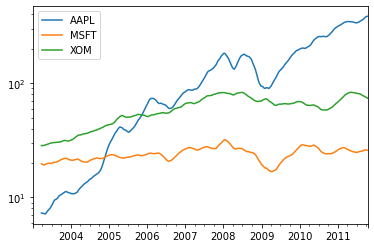

In [59]:
close_px.rolling(60).mean().plot(logy=True)

In [60]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Funções exponencialmente ponderadas

In [72]:
aapl_px = close_px.AAPL['2006':'2007']

ma60 = aapl_px.rolling(30, min_periods=20).mean()

ewma60 = aapl_px.ewm(span=30).mean()

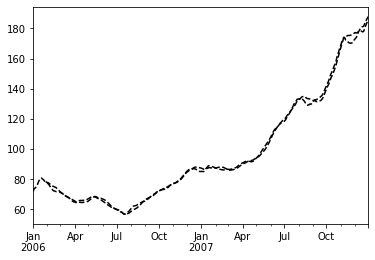

In [73]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k--', label='EW MA')
plt.show()

### Funções de janela móvel binárias

In [74]:
spx_px = close_px_all['SPX']

spx_rets = spx_px.pct_change()

returns = close_px.pct_change()

<AxesSubplot:>

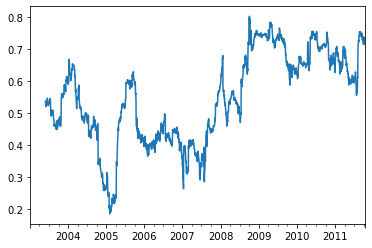

In [75]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

corr.plot()

<AxesSubplot:>

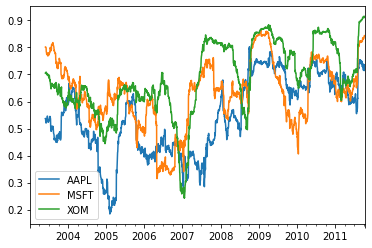

In [76]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### Funções de janela móvel definidas pelo usuário

In [77]:
from scipy.stats import percentileofscore

In [78]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [79]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

<AxesSubplot:>

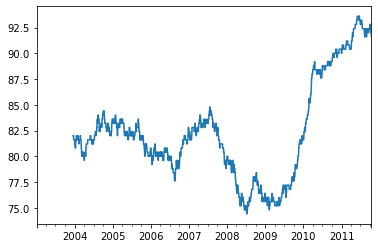

In [80]:
result.plot()